In [123]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [124]:
delitos = pd.read_csv("delitos_puerto_montt_2021.csv")
delitos

,ANHO-MES,Homicidios,Hurtos,Lesiones leves,Lesiones menos graves- graves o gravísimas,Otros robos con fuerza,Robo con violencia o intimidación,Robo de objetos de o desde vehículo,Robo de vehículo motorizado,Robo en lugar habitado,Robo en lugar no habitado,Robo por sorpresa,Violaciones,Abandono de armas,Hallazgo de armas o explosivos,Otros ley de armas,Porte de armas,Tenencia ilegal de armas o explosivos,Amenazas,Comercio ambulante o clandestino,Consumo alcohol vía pública,Daños,Desórdenes,Ebriedad,Otras incivilidades,Riña pública,Ruidos molestos,Abigeato,Abusos sexuales y otros delitos sexuales,Violencia intrafamiliar a adulto mayor,Violencia intrafamiliar a hombre,Violencia intrafamiliar a mujer,Violencia intrafamiliar a niño,Violencia intrafamiliar no clasificado,Receptación,Robo frustrado
0,2005-1,0,249,100,44,25,44,34,4,61,53,18,3,0,0,0,0,4,20,48,3,106,19,50,6,0,0,1,6,0,9,95,1,0,1,3
1,2005-2,0,253,91,37,4,34,34,10,49,59,10,3,0,0,0,4,4,22,30,1,98,25,39,7,0,0,4,3,2,8,93,0,0,1,9
2,2005-3,2,242,107,31,8,44,41,1,40,49,10,1,0,0,0,1,4,33,36,4,93,39,36,7,0,0,2,6,0,7,122,0,0,0,4
3,2005-4,4,306,95,30,12,27,35,6,56,48,21,5,0,0,0,5,2,22,16,13,78,31,61,28,0,1,3,6,0,7,86,0,0,2,1
4,2005-5,0,268,107,29,12,41,39,5,80,66,12,5,0,0,0,1,3,13,30,1,124,38,44,6,0,1,2,4,1,5,80,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2021-5,0,112,40,25,3,22,27,4,51,36,14,7,0,0,0,8,0,203,86,432,174,2,33,81,2,1,1,20,8,49,192,3,11,6,6
197,2021-6,0,125,49,22,0,16,32,8,51,37,7,5,0,0,0,4,1,182,45,516,183,0,36,59,2,0,1,21,4,41,211,3,8,5,4
198,2021-7,0,141,58,22,3,28,34,13,46,24,13,9,0,0,0,4,1,200,20,496,210,4,40,50,4,0,1,30,8,60,247,5,8,9,6
199,2021-8,0,183,47,27,2,37,42,16,77,42,14,6,0,0,1,6,0,180,35,572,190,4,43,61,4,0,2,24,9,51,225,7,8,5,6


In [125]:
# Eliminar entradas en 0
delitos = delitos.iloc[:-3]
delitos.iloc[-5:]

,ANHO-MES,Homicidios,Hurtos,Lesiones leves,Lesiones menos graves- graves o gravísimas,Otros robos con fuerza,Robo con violencia o intimidación,Robo de objetos de o desde vehículo,Robo de vehículo motorizado,Robo en lugar habitado,Robo en lugar no habitado,Robo por sorpresa,Violaciones,Abandono de armas,Hallazgo de armas o explosivos,Otros ley de armas,Porte de armas,Tenencia ilegal de armas o explosivos,Amenazas,Comercio ambulante o clandestino,Consumo alcohol vía pública,Daños,Desórdenes,Ebriedad,Otras incivilidades,Riña pública,Ruidos molestos,Abigeato,Abusos sexuales y otros delitos sexuales,Violencia intrafamiliar a adulto mayor,Violencia intrafamiliar a hombre,Violencia intrafamiliar a mujer,Violencia intrafamiliar a niño,Violencia intrafamiliar no clasificado,Receptación,Robo frustrado
193,2021-2,1,107,48,21,2,21,18,13,37,43,5,7,0,0,1,3,2,190,5,285,147,1,42,55,3,0,2,23,11,28,165,1,9,3,9
194,2021-3,1,158,59,26,1,20,11,9,43,59,18,6,0,0,1,3,1,210,37,498,205,17,18,61,1,0,1,20,5,39,182,2,10,8,2
195,2021-4,0,180,43,15,2,21,28,7,37,36,16,11,0,0,1,5,0,159,126,521,168,7,23,108,1,0,2,29,7,30,180,2,17,8,5
196,2021-5,0,112,40,25,3,22,27,4,51,36,14,7,0,0,0,8,0,203,86,432,174,2,33,81,2,1,1,20,8,49,192,3,11,6,6
197,2021-6,0,125,49,22,0,16,32,8,51,37,7,5,0,0,0,4,1,182,45,516,183,0,36,59,2,0,1,21,4,41,211,3,8,5,4


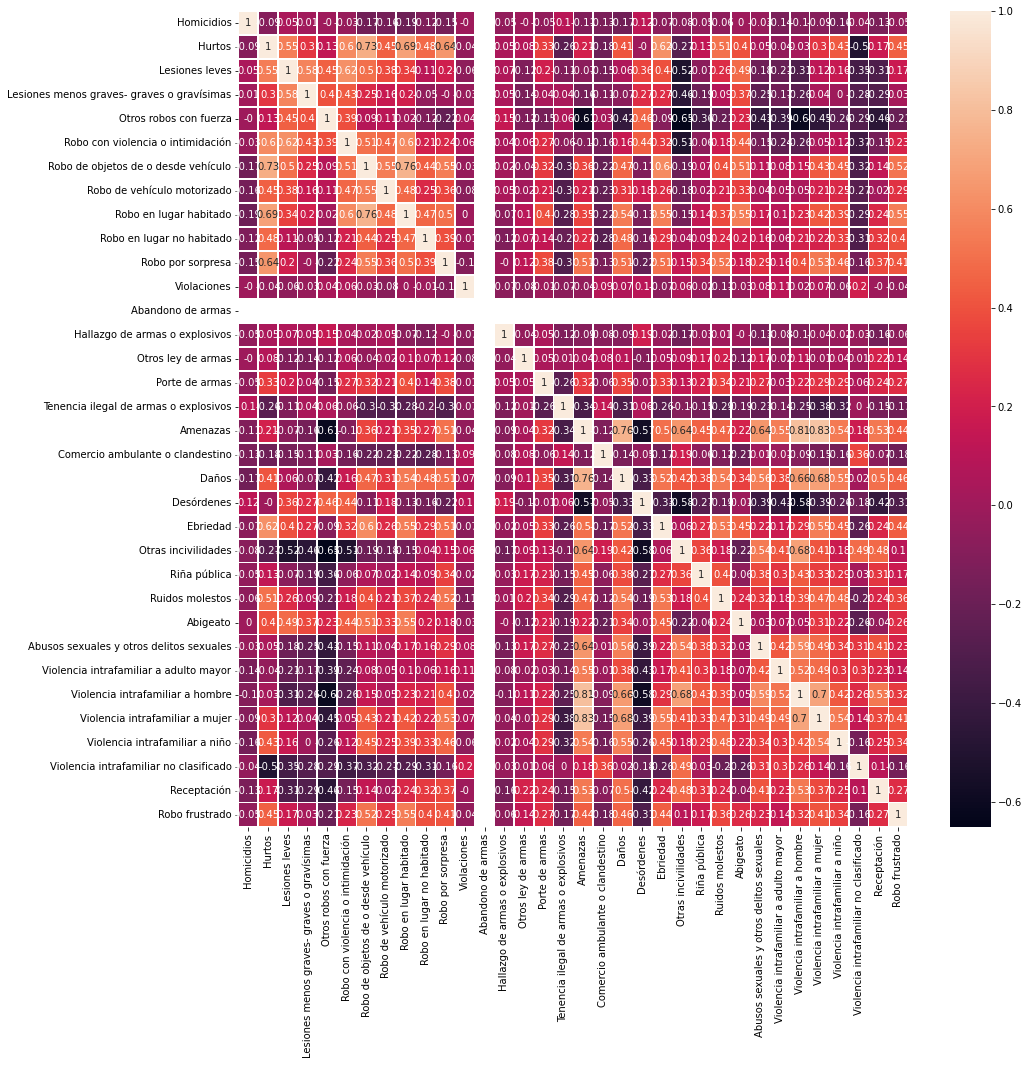

In [126]:
#Matriz de Correlación
matriz_corr = delitos.corr().round(2)

fig, ax = plt.subplots(figsize=(15,15));         # Sample figsize in inches
sns.heatmap(data = matriz_corr, annot=True, linewidths=.5, ax=ax);

In [ ]:
#Esta gráfica de pares, no permite apreciar el comportamiento de los datos. 
sns.pairplot(data = delitos, palette = 'colorblind');

Output hidden; open in https://colab.research.google.com to view.

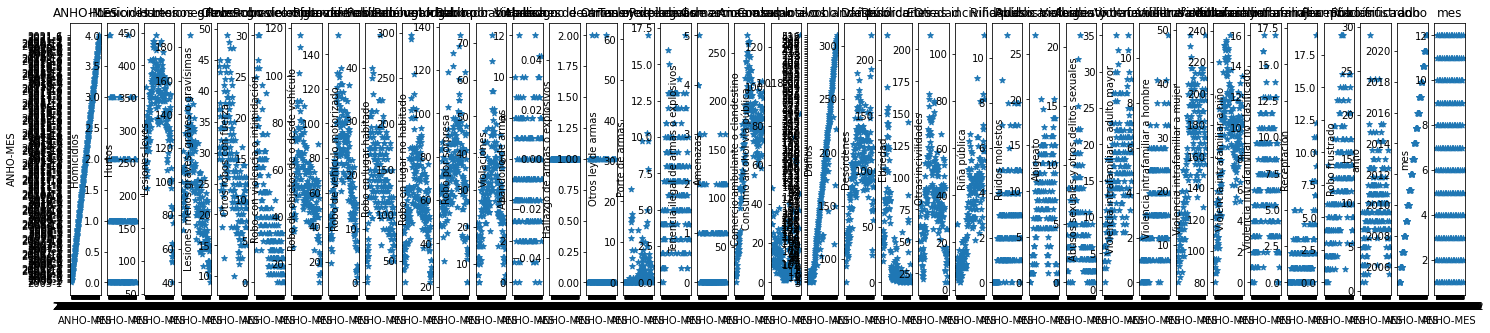

In [ ]:
#Graficar Atributos
# Solamente vale la pena graficar con eje x con atributo ANHO-MES
plt.figure(figsize=(25,5))

atributos = delitos.columns #delitos.columns para ver todos los atributos
eje_x = delitos['ANHO-MES']

for i, col in enumerate(atributos):
  plt.subplot(1, len(atributos), i+1)
  x = eje_x
  y = delitos[col]
  plt.scatter(x,y,marker='*')
  plt.title(col)
  plt.xlabel('ANHO-MES')
  plt.ylabel(col)

In [127]:
delitos[['anho', 'mes']] = delitos['ANHO-MES'].str.split('-', expand=True)
delitos = delitos.astype({'anho': int, 'mes': int})
print(delitos)

    ANHO-MES  Homicidios  Hurtos  ...  Robo frustrado  anho  mes
0     2005-1           0     249  ...               3  2005    1
1     2005-2           0     253  ...               9  2005    2
2     2005-3           2     242  ...               4  2005    3
3     2005-4           4     306  ...               1  2005    4
4     2005-5           0     268  ...               3  2005    5
..       ...         ...     ...  ...             ...   ...  ...
193   2021-2           1     107  ...               9  2021    2
194   2021-3           1     158  ...               2  2021    3
195   2021-4           0     180  ...               5  2021    4
196   2021-5           0     112  ...               6  2021    5
197   2021-6           0     125  ...               4  2021    6

[198 rows x 38 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [154]:
#Separación del conjunto de datos para entrenamiento y testeo. 

from sklearn.model_selection import train_test_split
y = delitos.drop(['anho', 'mes'], axis=1).columns #la idea es borrar esas columnas, y recorrer los delitos 
for i in y:
  y = delitos[str(i)]
  X = delitos[['anho','mes']]
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 10)
  print("entrenamiento: X = {}, y = {}".format(X_train.shape, y_train.shape))
  print("Testeo: X = {}, y = {}".format(X_test.shape, y_test.shape))

entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entrenamiento: X = (158, 2), y = (158,)
Testeo: X = (40, 2), y = (40,)
entren

In [137]:
#Creación del modelo de regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score

modelo = LinearRegression() #Hipotesis

In [138]:
#Entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [139]:
#Evaluacion del Entrenamiento con el modelo

y_predictede = modelo.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_predictede))
r2 = r2_score(y_train, y_predictede)

print("Rendimiento del conjunto de entrenamiento")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))

Rendimiento del conjunto de entrenamiento
RMSE: 4.304478735615783
R2: 0.06318767320066432


In [140]:
#Evaluacion del Testeo con el modelo

y_predictedt = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predictedt))
r2 = r2_score(y_test, y_predictedt)

print("Rendimiento del conjunto de testeo")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))

Rendimiento del conjunto de testeo
RMSE: 5.275633412955546
R2: -0.07263928732606151


In [ ]:
###Gráficas de rendimiento

(40,)


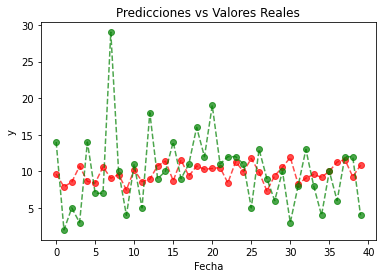

In [155]:
#Grafica de rendimiento de las predicciones

eje_x = np.array(range(0, y_predictedt.shape[0]))
print(y_predictedt.shape)
plt.plot(eje_x, y_predictedt, linestyle = "--", marker = "o", alpha = 0.7, color = "r", label = "Predicciones")
plt.plot(eje_x, y_test, linestyle = "--", marker = "o", alpha = 0.7, color = "g", label = "y_test")
plt.xlabel("Fecha")
plt.ylabel("Delitos")
plt.title("Predicciones vs Valores Reales")
plt.show()

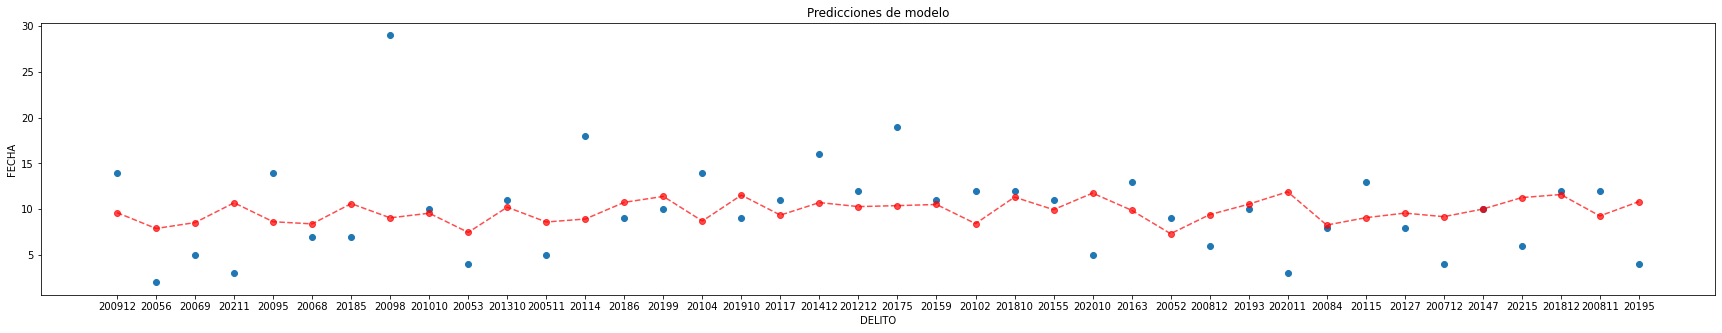

In [161]:
#Grafica ordenada

plt.figure(figsize=(30,5))

X_test = pd.DataFrame(X_test,columns=['anho','mes'])
X_test['ANHO-MES'] = X_test['anho'].map(str) + "" + X_test['mes'].map(str)

#atributos = delitos.columns for i, col in enumerate(atributos):

plt.plot(eje_x, y_predictedt, linestyle = "--", marker = "o", alpha=0.7, color="r", label = "Predicciones")
plt.scatter(X_test['ANHO-MES'], y_test, marker="o")
plt.title("Predicciones de modelo")
plt.xlabel("DELITO")
plt.ylabel("FECHA")
plt.show()